In [60]:
# Import neccesary libraries and ,odules
import pandas_profiling as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Zion\AppData\Local\Temp\ipykernel_12976\2026330229.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [3]:
# Load the dataset
df = pd.read_csv('climate-risk-index-1.csv', index_col=None)
df.head(10)

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan
5,5,6,NaN,NaN,Sierra Leone,102,88.50,42,0.16,68,10,124,0.0011,131,0.114,SLE,Sierra Leone
6,6,7,NaN,NaN,South Africa,33,45.67,84,0.03,51,19,24,0.4722,7,3427.958,ZAF,South Africa
7,7,8,NaN,NaN,Serbia,83,75.50,114,0.00,114,0,33,0.2794,45,272.927,SRB,Republic of Serbia
8,8,9,NaN,NaN,Slovak Republic,123,105.33,97,0.02,102,1,115,0.0046,106,7.468,SVK,Slovakia
9,9,10,NaN,NaN,Solomon Islands,89,76.83,39,0.17,102,1,80,0.0445,121,0.511,SLB,Solomon Islands


This dataset contains information about the Global Climate Risk Index and associated economic data for countries around the world

- the_geom: Geometry of the country (Geometry)
- the_geom: Geometry of the country (Geometry)
- the_geom_webmercator: Web Mercator projection of the geometry of the country (Geometry)
- cri_rank: Rank of the country on the Climate Risk Index (Integer)
- cri_score: Score of the country on the Climate Risk Index (Integer)
- fatalities_per_100k_rank: Rank of the country in terms of fatalities per 100,000 people (Integer)
- fatalities_per_100k_total: Total number fatalities per 100,000 people (Integer)
- fatalities_rank: Rank of the country in terms of total fatalities (Integer)
- fatalities_total: Total number of fatalities (Integer)
- losses_per_gdp__rank: Rank of the country in terms of losses per GDP (Integer)
- losses_per_gdp__total: Total losses per GDP (Integer)
- losses_usdm_ppp_rank: Rank of the country in terms of losses in USDM PPP (Integer)
- losses_usdm_ppp_total: Total losses in USDM PPP (Integer)
- rw_country_code: Country code (String)
- rw_country_name: Country name (String)

### Accessing the dataset

In [4]:
df.info()
print('\n There are ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns in the dataset')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

In [5]:
df.describe()

,index,cartodb_id,the_geom,the_geom_webmercator,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total
count,182.000000,182.000000,0.0,0.0,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,131.000000,182.000000,182.000000
mean,90.500000,91.500000,NaN,NaN,85.230769,81.791923,78.609890,0.519670,77.626374,86.840659,85.302198,1.517654,85.302198,907.507599
std,52.683014,52.683014,NaN,NaN,44.708529,34.582412,37.858511,3.393934,37.500688,427.350623,44.691600,8.171267,44.691600,4483.998505
min,0.000000,1.000000,NaN,NaN,1.000000,12.170000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000100,1.000000,0.000000
25%,45.250000,46.250000,NaN,NaN,46.250000,52.872500,46.250000,0.000000,46.250000,0.000000,46.250000,0.016500,46.250000,0.000000
50%,90.500000,91.500000,NaN,NaN,91.000000,77.500000,91.500000,0.020000,90.000000,2.000000,91.500000,0.084100,91.500000,30.347000
75%,135.750000,136.750000,NaN,NaN,135.000000,124.500000,114.000000,0.120000,114.000000,22.750000,135.000000,0.275950,135.000000,262.178250
max,181.000000,182.000000,NaN,NaN,135.000000,124.500000,114.000000,43.660000,114.000000,4317.000000,135.000000,77.369400,135.000000,40077.222000


In [35]:
# Check rows that have at least one null value (excluding the two geometry columns)
df_no_geom = df.drop(['the_geom', 'the_geom_webmercator'], axis=1)
df_no_geom[df_no_geom.isna().any(axis=1)]

,index,cartodb_id,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
3,3,4,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
13,13,14,Tunisia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,TUN,Tunisia
20,20,21,Venezuela,135,124.50,114,0.00,114,0,135,NaN,135,0.000,VEN,Venezuela
23,23,24,United Arab Emirates,127,109.17,86,0.03,85,3,133,NaN,132,0.087,ARE,United Arab Emirates
34,34,35,Mauritania,135,124.50,114,0.00,114,0,135,NaN,135,0.000,MRT,Mauritania
36,36,37,Singapore,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SGP,Singapore
37,37,38,Suriname,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SUR,Suriname
38,38,39,Azerbaijan,135,124.50,114,0.00,114,0,135,NaN,135,0.000,AZE,Azerbaijan
42,42,43,Guyana,135,124.50,114,0.00,114,0,135,NaN,135,0.000,GUY,Guyana
52,52,53,Antigua and Barbuda,135,124.50,114,0.00,114,0,135,NaN,135,0.000,ATG,Antigua and Barbuda


In [38]:
x = df_no_geom[df_no_geom.isna().any(axis=1)]
print("There are " + str(x.shape[0]) +\
      " enteries containing at least one null value excluding null from the two columns for geometry")

There are 53 enteries containing at least one null value excluding null from the two columns for geometry


In [7]:
# Check countries without country code and name
df_no_geom[df_no_geom.rw_country_name.isna()==True]

,index,cartodb_id,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
139,139,140,Taiwan,51,56.17,75,0.05,65,11,53,0.1338,16,1472.523,NaN,NaN
160,160,161,Kosovo,135,124.50,114,0.00,114,0,135,NaN,135,0.000,NaN,NaN
175,175,176,Puerto Rico,110,97.00,114,0.00,114,0,81,0.0437,78,57.565,NaN,NaN


In [8]:
df[df.losses_per_gdp__total.isna()==True]

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
13,13,14,NaN,NaN,Tunisia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,TUN,Tunisia
20,20,21,NaN,NaN,Venezuela,135,124.50,114,0.00,114,0,135,NaN,135,0.000,VEN,Venezuela
23,23,24,NaN,NaN,United Arab Emirates,127,109.17,86,0.03,85,3,133,NaN,132,0.087,ARE,United Arab Emirates
34,34,35,NaN,NaN,Mauritania,135,124.50,114,0.00,114,0,135,NaN,135,0.000,MRT,Mauritania
36,36,37,NaN,NaN,Singapore,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SGP,Singapore
37,37,38,NaN,NaN,Suriname,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SUR,Suriname
38,38,39,NaN,NaN,Azerbaijan,135,124.50,114,0.00,114,0,135,NaN,135,0.000,AZE,Azerbaijan
42,42,43,NaN,NaN,Guyana,135,124.50,114,0.00,114,0,135,NaN,135,0.000,GUY,Guyana
52,52,53,NaN,NaN,Antigua and Barbuda,135,124.50,114,0.00,114,0,135,NaN,135,0.000,ATG,Antigua and Barbuda


In [9]:
df.duplicated().sum()

0

In [10]:
df.country.duplicated().sum()

0

### Issues

1. A quick look at the dataset shows that the first column, index, is redundant as we already have an index for the dataset.
2. **the_geom** and **the_geom_webmercator** columns both have no enteries.
3. 3 Enteries do not have Country code and Country Name
4. There are null values for some countries' losses per GDP total


### Data Cleaning

In [11]:
df_copy = df.copy()
df.head()

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [12]:
# To remove the empty columns and index column
df_copy.drop(columns = ['index', 'the_geom_webmercator', 'the_geom'], inplace=True)
df_copy.columns

Index(['cartodb_id', 'country', 'cri_rank', 'cri_score',
       'fatalities_per_100k_rank', 'fatalities_per_100k_total',
       'fatalities_rank', 'fatalities_total', 'losses_per_gdp__rank',
       'losses_per_gdp__total', 'losses_usdm_ppp_rank',
       'losses_usdm_ppp_total', 'rw_country_code', 'rw_country_name'],
      dtype='object')

In [13]:
# For the countries not having their name and code, somethings can be done.
# Taiwan is not really a country, Puerto Rico cannot be called a country, but
# Kosovo can be regarded to as a country in this regard.

In [14]:
# The null values for losses_per_gdp__total should be replaced with zero
df_copy['losses_per_gdp__total'] = df_copy['losses_per_gdp__total'].fillna(0)
df_copy[df_copy.losses_per_gdp__total.isna()==True]

,cartodb_id,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name


In [61]:
profile = pp.ProfileReport(df_copy) 

profile.to_file("pandas_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## E.D.A

In [18]:
# Set style
sns.set_theme(style='darkgrid')  

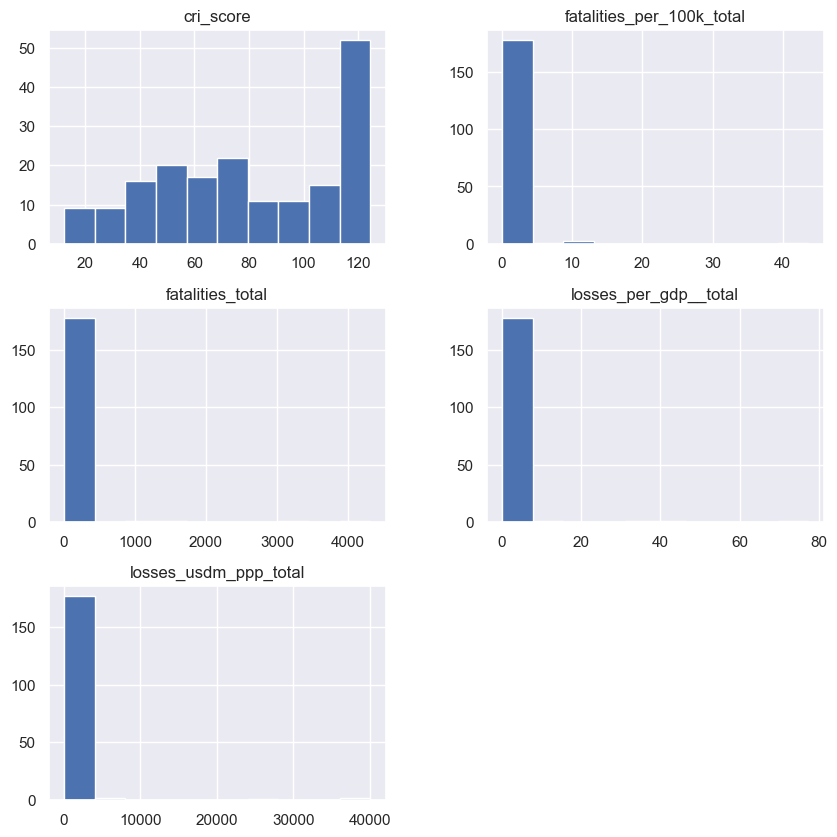

In [24]:

# Hoistogram of nominal features
df_copy.hist(['cri_score', 'fatalities_per_100k_total', 'fatalities_total', 'losses_per_gdp__total', 'losses_usdm_ppp_total'], figsize= (10,10));

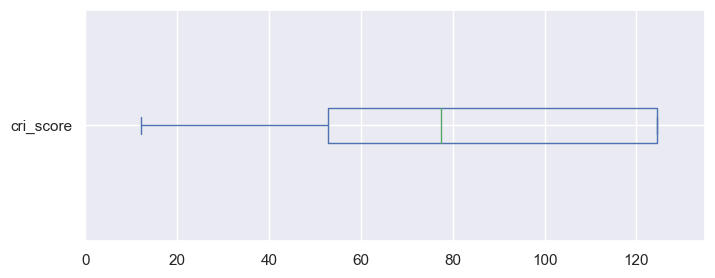

In [58]:
df_copy.cri_score.plot(kind="box", vert=0, figsize=(8,3));
plt.xlim(0,135);

In [ ]:
plt.figure(figsize=(10,18));

plt.subplot()

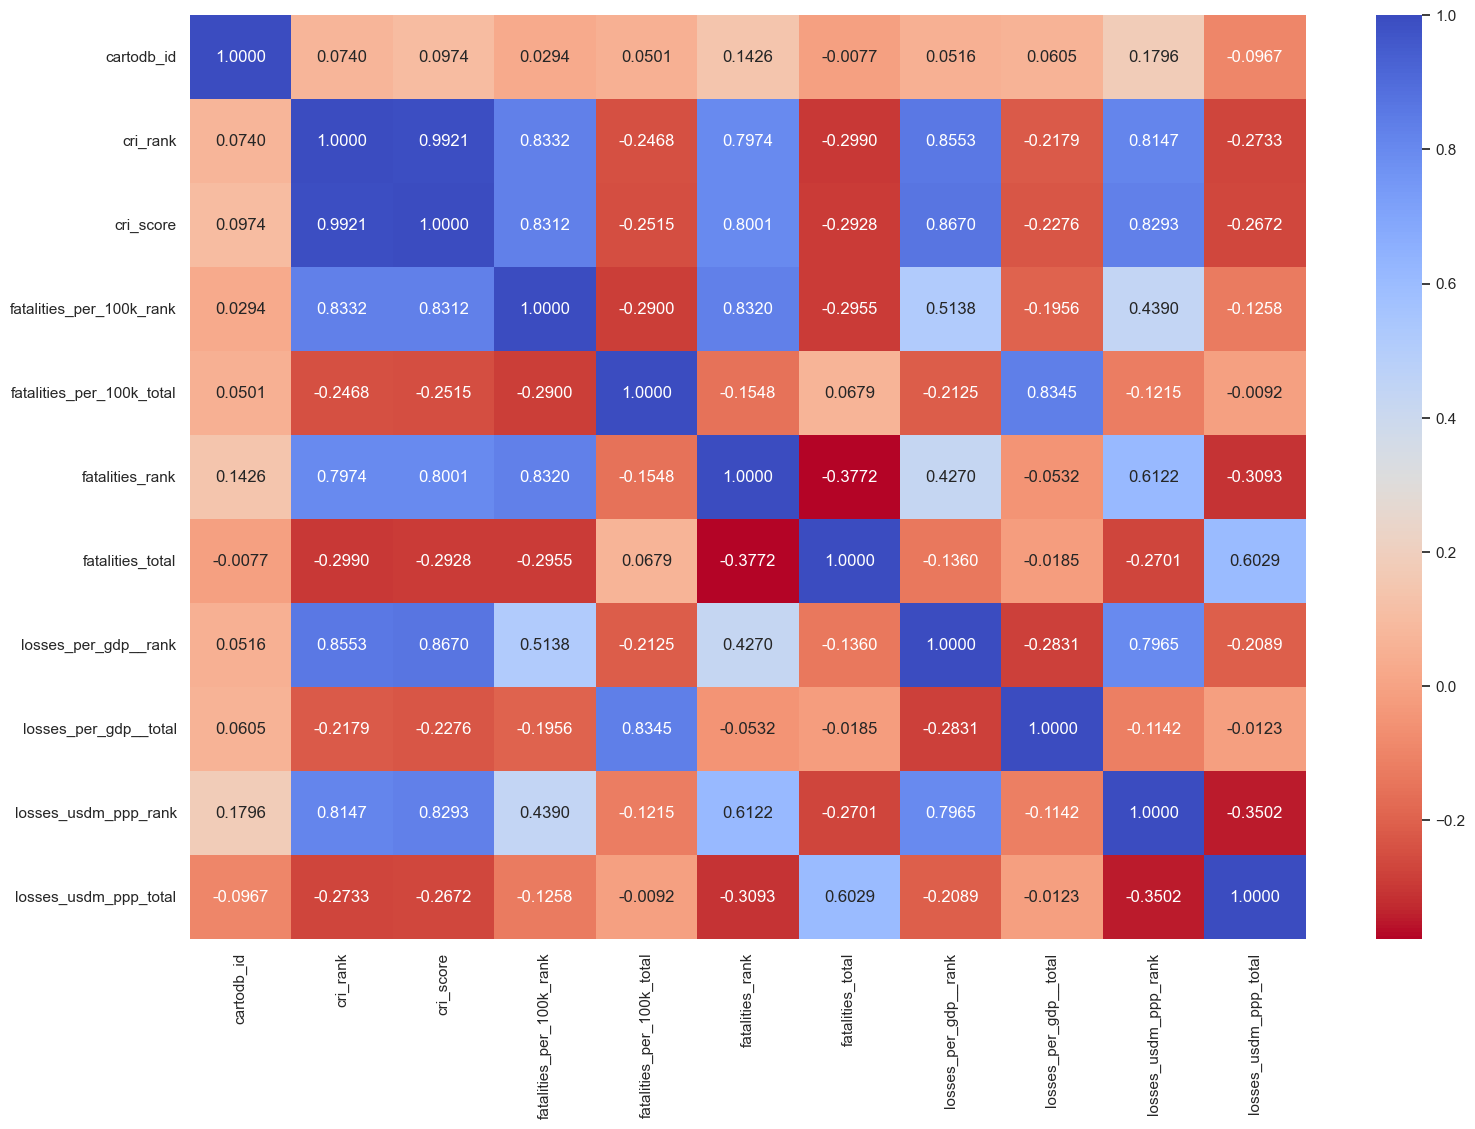

In [65]:
plt.figure(figsize = (18,12))
sns.heatmap(df_c.corr(), annot=True, fmt='.4f', cmap='coolwarm_r');